## **Stock News Headlines Sentimental Analysis using NLP Techniques** 

### **Importing Libraries**

In [ ]:
#importing libraries for reading csv
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from gensim.models import Word2Vec
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


### **Reading Datatset**

In [ ]:
#reading our dataset
df = pd.read_csv(r"Stock News Dataset.csv",encoding = "ISO-8859-1")
df.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite


### **Shape of the dataset**

In [ ]:
#checking the number of rows and columns of the dataset
print("Rows and Columns of the dataset :- ",df.shape)

Rows and Columns of the dataset :-  (4101, 27)


### **Checking the distribution of target variable**

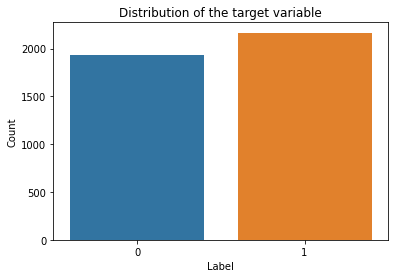

In [ ]:
#plotting the target variable
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Label', data=df)
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of the target variable')
plt.show()

### **Dropping unwanted columns**

In [ ]:
# dropping the unwanted columns
df = df.drop('Date',axis=1)
df.head(2)

,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite


### **Merging the Columns**

In [ ]:
df1=df.iloc[:,0]
df1.head()

0    0
1    0
2    0
3    1
4    1
Name: Label, dtype: int64

In [ ]:
df2=df.iloc[:,1:26]
df2.head(1)

,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title


In [ ]:
# Merge all 25 columns into a single column
df2['headlines'] = df2.apply(lambda x: ' '.join(x.astype(str)), axis=1)
df2['headlines']

0       A 'hindrance to operations': extracts from the...
1       Scorecard The best lake scene Leader: German s...
2       Coventry caught on counter by Flo United's riv...
3       Pilgrim knows how to progress Thatcher facing ...
4       Hitches and Horlocks Beckham off but United su...
                              ...                        
4096    Barclays and RBS shares suspended from trading...
4097    2,500 Scientists To Australia: If You Want To ...
4098    Explosion At Airport In Istanbul Yemeni former...
4099    Jamaica proposes marijuana dispensers for tour...
4100    A 117-year-old woman in Mexico City finally re...
Name: headlines, Length: 4101, dtype: object

In [ ]:
# Concatenate the two dataframes vertically
data = pd.concat([df1, df2['headlines']],axis=1)
data

,Label,headlines
0,0,A 'hindrance to operations': extracts from the...
1,0,Scorecard The best lake scene Leader: German s...
2,0,Coventry caught on counter by Flo United's riv...
3,1,Pilgrim knows how to progress Thatcher facing ...
4,1,Hitches and Horlocks Beckham off but United su...
...,...,...
4096,0,Barclays and RBS shares suspended from trading...
4097,1,"2,500 Scientists To Australia: If You Want To ..."
4098,1,Explosion At Airport In Istanbul Yemeni former...
4099,1,Jamaica proposes marijuana dispensers for tour...


### **NLP Pre-Processing**  

In [ ]:
# removing numbers 
data['headlines'] = data['headlines'].str.replace(r'\d+(\.\d+)?', 'numbers')
data.head(5)

<ipython-input-10-234ed52a87d3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['headlines'] = data['headlines'].str.replace(r'\d+(\.\d+)?', 'numbers')


,Label,headlines
0,0,A 'hindrance to operations': extracts from the...
1,0,Scorecard The best lake scene Leader: German s...
2,0,Coventry caught on counter by Flo United's riv...
3,1,Pilgrim knows how to progress Thatcher facing ...
4,1,Hitches and Horlocks Beckham off but United su...


In [ ]:
#Converting into lowercase
data['headlines'] = data['headlines'].str.lower()
data.head(5)

,Label,headlines
0,0,a 'hindrance to operations': extracts from the...
1,0,scorecard the best lake scene leader: german s...
2,0,coventry caught on counter by flo united's riv...
3,1,pilgrim knows how to progress thatcher facing ...
4,1,hitches and horlocks beckham off but united su...


In [ ]:
#Replacing next line by a 'white space'
data['headlines'] = data['headlines'].str.replace(r'\n'," ") 

# Replacing currency sign by 'money'
data['headlines'] = data['headlines'].str.replace(r'£|\$', 'money')

# Replacing large white space by single white space
data['headlines'] = data['headlines'].str.replace(r'\s+', ' ')

# Replacing special characters by white space
data['headlines'] = data['headlines'].str.replace(r"[^a-zA-Z0-9]+", " ")

<ipython-input-12-a8d7e46492e3>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['headlines'] = data['headlines'].str.replace(r'\n'," ")
<ipython-input-12-a8d7e46492e3>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  data['headlines'] = data['headlines'].str.replace(r'£|\$', 'money')
<ipython-input-12-a8d7e46492e3>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data['headlines'] = data['headlines'].str.replace(r'\s+', ' ')
<ipython-input-12-a8d7e46492e3>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  data['headlines'] = data['headlines'].str.replace(r"[^a-zA-Z0-9]+", " ")


In [ ]:
data.head(5)

,Label,headlines
0,0,a hindrance to operations extracts from the le...
1,0,scorecard the best lake scene leader german sl...
2,0,coventry caught on counter by flo united s riv...
3,1,pilgrim knows how to progress thatcher facing ...
4,1,hitches and horlocks beckham off but united su...


### **Tokenization**

In [ ]:
# tokenizing the documents
list_array = []
for i in range(len(data['headlines'])):
  temp = data['headlines'][i].split(' ')
  list_array.append(temp)

In [ ]:
# converting list_array into numpy array
list_array = np.array(list_array)

<ipython-input-15-764616f2eb65>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  list_array = np.array(list_array)


### **Stemming & Stopward Removal**

In [ ]:
stemmer = PorterStemmer()

In [ ]:
# performing stemming & stop word removal on the tokenized words 
for i  in range(len(list_array)):
  words = [stemmer.stem(word) for word in list_array[i] if word not in set(stopwords.words('english'))]
  list_array[i] = words

### **Lemmatization**

In [ ]:
# performing lemmatizing 
list_headlines = []
lemmatizer = WordNetLemmatizer()
for i in range(len(list_array)):
  words = [lemmatizer.lemmatize(word) for word in list_array[i]]
  words = ' '.join(words)
  list_headlines.append(words)

In [ ]:
list_headlines = list(list_headlines)

In [ ]:
list_headlines[0]

'hindranc oper extract leak report scorecard hugh instant hit buoy blue jack get skate ice cold alex chao maracana build unit deplet leicest prevail elliott spoil everton parti hungri spur sen rich pick gunner wide easi target derbi rais glass strupar debut doubl southgat strike leed pay penalti hammer hand robson youth lesson saint parti like number wear wolv turn lamb stump mike catch testi gough taunt langer escap hit number flintoff injuri pile woe england hunter threaten jospin new battl somm kohl successor drawn scandal differ men woman sara denver nurs turn solicitor diana landmin crusad put torus panic yeltsin resign caught opposit flat foot russian roulett sold recov titl'

### **Bag of Words**

In [ ]:
cv = CountVectorizer(max_features=50)
Bow = cv.fit_transform(list_headlines).toarray()

In [ ]:
Bow[:5]

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 4, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1,
        0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0],
       [2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0]])

### **Tf-Idf**

In [ ]:
tf = TfidfVectorizer(max_features=50)
tfidf = tf.fit_transform(list_headlines).toarray()

In [ ]:
tfidf[:5]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.41169129, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.29853651, 0.        , 0.42256644, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.39458329,
        0.        , 0.        , 0.        , 0.48424607, 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.41549203, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.22391141, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.76887981, 0.        ,
        0.23511699, 0.        , 0.22935929, 0. 

### **Word2Vec**

In [ ]:
# performing lemmatizing 
lemmatizer = WordNetLemmatizer()
for i in range(len(list_array)):
  words = [lemmatizer.lemmatize(word) for word in list_array[i]]
  list_array[i] = words

In [ ]:
word2vec = Word2Vec(list_array, min_count=2)

In [ ]:
v1 = word2vec.wv['work']
v1

array([ 0.8841289 ,  0.27691364, -0.4821399 ,  0.12342966, -0.44532195,
       -0.26696378,  0.03501777,  0.39886886,  0.09552924, -0.30577675,
       -0.23550442, -0.01636664,  0.24808261, -0.02717515,  0.1620689 ,
        0.27343664,  0.04620099, -0.2388581 , -0.43883768,  0.5007952 ,
        0.21729954,  0.20729189, -0.20368204, -0.7470815 , -0.25593612,
        0.33404493,  0.1462208 , -0.11999304,  0.03724469, -0.1659818 ,
        0.05668767,  0.30458936, -1.0046494 , -0.43588325,  0.4392221 ,
        0.5408813 , -0.21510182,  0.11801285,  0.3425327 , -0.24928506,
       -0.2579842 , -0.00563084, -0.5955832 ,  0.5659522 ,  0.14741412,
        0.06762839,  0.42714298, -0.08357985,  0.2766211 ,  0.6617683 ,
        0.4157613 , -0.10644194, -0.03293714,  0.21306755,  0.5730148 ,
        0.35029316,  0.29320207, -0.33216307,  0.30449164,  0.12906387,
        0.2765627 , -0.6542107 ,  0.14036651, -0.0282042 , -0.12286548,
       -0.00183148,  0.14666028,  0.28052232, -0.15948778, -0.50

In [ ]:
sim_words = word2vec.wv.most_similar('work')
sim_words

[('littl', 0.9407216310501099),
 ('pharma', 0.9400098323822021),
 ('person', 0.9339442253112793),
 ('zinc', 0.9322502613067627),
 ('better', 0.9302760362625122),
 ('alright', 0.9295676946640015),
 ('giveaway', 0.9280829429626465),
 ('thing', 0.9262166023254395),
 ('poo', 0.9243161678314209),
 ('seam', 0.9234308004379272)]

### **Splitting the dataset**

In [ ]:
# Split into training and testing data
x = Bow
y = data['Label']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

### **Implementing Multinomial Naive Bayes**

In [ ]:
model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [ ]:
model.score(x_test, y_test)

0.48927875243664715

In [ ]:
# Split into training and testing data
x = tfidf
y = data['Label']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [ ]:
model = MultinomialNB()
model.fit(x, y)

MultinomialNB()

In [ ]:
model.score(x_test, y_test)

0.5282651072124757

### **Implementing Random Forest Classifier**

In [ ]:
# implement RandomForest Classifier
model=RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier()

In [ ]:
model.score(x_test,y_test)   

0.5019493177387915

In [ ]:
# Split into training and testing data
x = tfidf
y = data['Label']
x, x_test, y, y_test = train_test_split(x,y, stratify=y, test_size=0.25, random_state=42)

In [ ]:
model=RandomForestClassifier()
model.fit(x,y)

RandomForestClassifier()

In [ ]:
model.score(x_test,y_test)   

0.5038986354775828

### **POS-Tagging**

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


True

In [ ]:
list_headlines[0]

'hindranc oper extract leak report scorecard hugh instant hit buoy blue jack get skate ice cold alex chao maracana build unit deplet leicest prevail elliott spoil everton parti hungri spur sen rich pick gunner wide easi target derbi rais glass strupar debut doubl southgat strike leed pay penalti hammer hand robson youth lesson saint parti like number wear wolv turn lamb stump mike catch testi gough taunt langer escap hit number flintoff injuri pile woe england hunter threaten jospin new battl somm kohl successor drawn scandal differ men woman sara denver nurs turn solicitor diana landmin crusad put torus panic yeltsin resign caught opposit flat foot russian roulett sold recov titl'

In [ ]:
tokens = word_tokenize(list_headlines[0])

In [ ]:
tags = nltk.pos_tag(tokens,tagset="universal")

In [ ]:
tags 

[('hindranc', 'NOUN'),
 ('oper', 'ADP'),
 ('extract', 'ADJ'),
 ('leak', 'ADJ'),
 ('report', 'NOUN'),
 ('scorecard', 'VERB'),
 ('hugh', 'ADJ'),
 ('instant', 'NOUN'),
 ('hit', 'VERB'),
 ('buoy', 'ADJ'),
 ('blue', 'ADJ'),
 ('jack', 'NOUN'),
 ('get', 'NOUN'),
 ('skate', 'ADJ'),
 ('ice', 'NOUN'),
 ('cold', 'VERB'),
 ('alex', 'ADJ'),
 ('chao', 'NOUN'),
 ('maracana', 'X'),
 ('build', 'VERB'),
 ('unit', 'NOUN'),
 ('deplet', 'NOUN'),
 ('leicest', 'ADJ'),
 ('prevail', 'NOUN'),
 ('elliott', 'NOUN'),
 ('spoil', 'NOUN'),
 ('everton', 'NOUN'),
 ('parti', 'NOUN'),
 ('hungri', 'NOUN'),
 ('spur', 'VERB'),
 ('sen', 'NOUN'),
 ('rich', 'ADJ'),
 ('pick', 'NOUN'),
 ('gunner', 'NOUN'),
 ('wide', 'ADJ'),
 ('easi', 'NOUN'),
 ('target', 'NOUN'),
 ('derbi', 'NOUN'),
 ('rais', 'NOUN'),
 ('glass', 'NOUN'),
 ('strupar', 'NOUN'),
 ('debut', 'NOUN'),
 ('doubl', 'VERB'),
 ('southgat', 'VERB'),
 ('strike', 'NOUN'),
 ('leed', 'NOUN'),
 ('pay', 'NOUN'),
 ('penalti', 'NOUN'),
 ('hammer', 'NOUN'),
 ('hand', 'NOUN'),
 ('rob